In [98]:
#!pip3 install newspaper3k

In [99]:
import nltk
from newspaper import Article

In [100]:
#url = 'https://www.livemint.com/opinion/columns/three-things-that-will-make-the-budget-work-for-india-11612110308536.html'

#url = 'https://www.business-standard.com/budget/article/budget-byte-healthy-corporate-profits-may-help-improve-govt-spending-121012900973_1.html'

#url = 'https://www.thehindubusinessline.com/economy/budget/budget-move-to-tax-pf-contributions-of-over-25-lakhyear-raises-retrospectivity-questions/article33742595.ece?homepage=true'

#url = 'https://www.financialexpress.com/market/sebi-bans-kishore-biyani-others-from-securities-market-for-one-year-for-indulging-in-insider-trading/2187203/'

url = 'https://www.livemint.com/companies/news/hdfc-india-s-largest-mortgage-financier-may-remain-an-nbfc-11612425727417.html'
article = Article(url)

In [101]:
#Do some NLP
article.download()
article.parse()
nltk.download('punkt')
article.nlp()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [102]:
#get authors
article.authors

[]

In [103]:
article.publish_date

datetime.datetime(2021, 2, 4, 13, 49, 59, tzinfo=tzoffset(None, 19800))

In [104]:
#Get the top image of article
article.top_image

'https://images.livemint.com/img/2021/02/04/600x338/hdfc-kWDE--621x414@LiveMint_1612426219866.JPG'

In [105]:
#Article text
print(article.text)

India’s largest mortgage financier may remain a shadow lender, despite a central bank proposal for large non-banking finance firms to become full-fledged banks.

“In terms of remaining a large non-banking finance company, that option is very very much on the table," Housing Development Finance Corp. Vice Chairman and Chief Executive Officer Keki Mistry, said in an interview with Bloomberg TV on Thursday. “We will obviously have to look at the regulations and then take a call. We are very comfortable, we stand the way we are and we believe we would."

Also Read | The health nudge is merely a mirage

In November, a Reserve Bank of India panel recommended that large shadow lenders may be considered for conversion into banks after 10 years of operations, as authorities continue to nurse the sector that’s going through a prolonged cash crunch.

In recent years, shadow lenders have become a key source of last-mile credit for consumers who typically don’t qualify to borrow from traditional ba

In [106]:
#Summary of the article
print(article.summary)

India’s largest mortgage financier may remain a shadow lender, despite a central bank proposal for large non-banking finance firms to become full-fledged banks.
“In terms of remaining a large non-banking finance company, that option is very very much on the table," Housing Development Finance Corp. Vice Chairman and Chief Executive Officer Keki Mistry, said in an interview with Bloomberg TV on Thursday.
In recent years, shadow lenders have become a key source of last-mile credit for consumers who typically don’t qualify to borrow from traditional banks.
The RBI is expected to publish its final regulations on the conversion of shadow banks in the next few weeks after collecting feedback on the draft rules.
“Business is back to normal, growth is back to normal.


## Sentence tokenization using SpaCy

In [107]:
import spacy
from spacy.lang.en import English

nlp = English()

# Create the pipeline 'sentencizer' component
sbd = nlp.create_pipe('sentencizer')

# Add the component to the pipeline
nlp.add_pipe(sbd)

text = article.summary

#  "nlp" Object is used to create documents with linguistic annotations.
doc = nlp(text)

# create list of sentence tokens
sents_list = []
for sent in doc.sents:
    sents_list.append(sent.text)
print(sents_list)

['India’s largest mortgage financier may remain a shadow lender, despite a central bank proposal for large non-banking finance firms to become full-fledged banks.', '\n“In terms of remaining a large non-banking finance company, that option is very very much on the table," Housing Development Finance Corp. Vice Chairman and Chief Executive Officer Keki Mistry, said in an interview with Bloomberg TV on Thursday.', '\nIn recent years, shadow lenders have become a key source of last-mile credit for consumers who typically don’t qualify to borrow from traditional banks.', '\nThe RBI is expected to publish its final regulations on the conversion of shadow banks in the next few weeks after collecting feedback on the draft rules.', '\n“Business is back to normal, growth is back to normal.']


## Entity detection using SpaCy

In [108]:
import spacy
from spacy import displacy

In [109]:
nlp = spacy.load('en_core_web_sm') 
newsp = nlp(article.summary)
entities = [(i, i.label_, i.label) for i in newsp.ents]
entities

[(India, 'GPE', 384),
 (Housing Development Finance Corp., 'ORG', 383),
 (Keki Mistry, 'PERSON', 380),
 (Bloomberg TV, 'ORG', 383),
 (Thursday, 'DATE', 391),
 (recent years, 'DATE', 391),
 (RBI, 'ORG', 383),
 (the next few weeks, 'DATE', 391)]

In [110]:
displacy.render(newsp, style = "ent",jupyter = True)

## Wordcloud

In [111]:
txt = article.summary

In [112]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

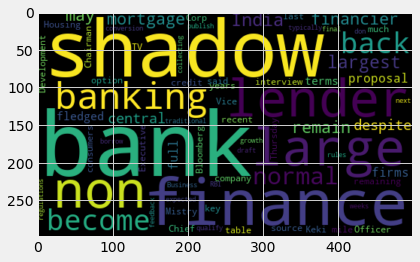

In [113]:
allwords = ''.join([twts for twts in txt])
wordcloud = WordCloud(width=500,height=300, random_state=21,  max_font_size=119).generate(allwords)
plt.imshow(wordcloud, interpolation="bilinear")

In [114]:
tokens = [t for t in txt.split()]
print(tokens)

['India’s', 'largest', 'mortgage', 'financier', 'may', 'remain', 'a', 'shadow', 'lender,', 'despite', 'a', 'central', 'bank', 'proposal', 'for', 'large', 'non-banking', 'finance', 'firms', 'to', 'become', 'full-fledged', 'banks.', '“In', 'terms', 'of', 'remaining', 'a', 'large', 'non-banking', 'finance', 'company,', 'that', 'option', 'is', 'very', 'very', 'much', 'on', 'the', 'table,"', 'Housing', 'Development', 'Finance', 'Corp.', 'Vice', 'Chairman', 'and', 'Chief', 'Executive', 'Officer', 'Keki', 'Mistry,', 'said', 'in', 'an', 'interview', 'with', 'Bloomberg', 'TV', 'on', 'Thursday.', 'In', 'recent', 'years,', 'shadow', 'lenders', 'have', 'become', 'a', 'key', 'source', 'of', 'last-mile', 'credit', 'for', 'consumers', 'who', 'typically', 'don’t', 'qualify', 'to', 'borrow', 'from', 'traditional', 'banks.', 'The', 'RBI', 'is', 'expected', 'to', 'publish', 'its', 'final', 'regulations', 'on', 'the', 'conversion', 'of', 'shadow', 'banks', 'in', 'the', 'next', 'few', 'weeks', 'after', 'co

## NLTK

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
India’s:1
largest:1
mortgage:1
financier:1
may:1
remain:1
shadow:3
lender,:1
despite:1
central:1
bank:1
proposal:1
large:2
non-banking:2
finance:2
firms:1
become:2
full-fledged:1
banks.:2
“In:1
terms:1
remaining:1
company,:1
option:1
much:1
table,":1
Housing:1
Development:1
Finance:1
Corp.:1
Vice:1
Chairman:1
Chief:1
Executive:1
Officer:1
Keki:1
Mistry,:1
said:1
interview:1
Bloomberg:1
TV:1
Thursday.:1
In:1
recent:1
years,:1
lenders:1
key:1
source:1
last-mile:1
credit:1
consumers:1
typically:1
don’t:1
qualify:1
borrow:1
traditional:1
The:1
RBI:1
expected:1
publish:1
final:1
regulations:1
conversion:1
banks:1
next:1
weeks:1
collecting:1
feedback:1
draft:1
rules.:1
“Business:1
back:2
normal,:1
growth:1
normal.:1


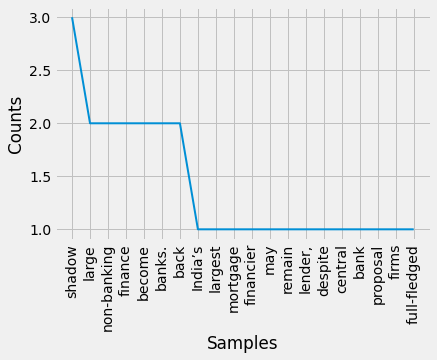

In [115]:
nltk.download('stopwords')
from nltk.corpus import stopwords
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)
